# **11장. 인공지능 분석**

In [ ]:
#인공지능을 활용하는 데이터 분석 : 분류, 예측
# - 분류(Classification) : 데이터의 속성을 분석하여 둘 이상의 그룹 중에 어디에 해당하는지 구분하는 문제
# - 예측 : 데이터를 바탕으로 앞으로 도출될 결과츨 추정하는 문제
# 특성(Feature) : 수집된 데이터를 가장 잘 설명할 수 있게 뽑은 항목
# 원시 데이터(Raw data) : 어떤 주제로 수집한 데이터 원본
# 학습 데이터(Training data) : 해결하고 싶은 문제에 맞게 데이터 특성을 정의하고 추출하여 학습을 위해 재구성한 데이터
# 데이터 가공 : 원시 데이터를 학습 데이터로 만드는 과정

# 학습(Learning) : 수학적 알고리즘에 특성을 충분히 입력하여 일정한 모양의 모형을 만드는 과정
# - 데이터를 입력하고 알고리즘이 내놓은 결과와 사람이 예상한 결과의 차이를 줄여가며 모형을 완성하는 과정

In [ ]:
# 분류 알고리즘
# - K-NN(K-Nearest Neighbors, 최근접 이웃) : 데이터로부터 거리가 가까운 k개의 레이블을 참조하여 많은 수에 해당하는 클래스로 분류하는 방법
#                                            클래스 간 수적 우위 계산을 용이하게 하기 위하여 보통 k를 3이나 9 등 홀수로 지정함
#                                            글씨인식, 얼굴인식, 유전자 패턴인식 등에 활용
# SVM(Support Vector Machine, 서포트 벡터 머신) : 두 클래스를 구분하는 가상의 결정경계면(Hyperplane, 초평면)을 계산하여 클래스를 분류하는 방법
# 의사결정 트리(Decision Tree)

In [ ]:
# 예측(Prediction)
# - 주로 회귀(Regression) 활용
# - 가격이나 확률과 같이 연속적인 값(Continuous value)을 예측

In [ ]:
# 와인 경작자 분류

# 와인 데이터 확인

from sklearn.datasets import load_wine
wine = load_wine()
print(wine.DESCR) #데이터에 대한 설명 확인

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            10.6  30.0    19.5   3.3
    Ma

In [ ]:
#원시 데이터에서 학습 데이터로 변환

import pandas as pd
import numpy as np

wine_feature = wine.data # 사이킷런의 와인 데이터에서 특성 넘파이 배열을 반환
wine_label = wine.target # 사이킷런의 와인 데이터에서 레이블 넘파이 배열을 반환

df_wine = pd.DataFrame(data = wine_feature, columns = [wine.feature_names])
df_wine['label'] = wine_label #label 열 추가
df_wine

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,label
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [ ]:
# 테스트 데이터 분할

from sklearn.model_selection import train_test_split

df_wine = df_wine.astype({'label' : 'int'})
train, test = train_test_split(df_wine, test_size = 0.3, random_state=0, stratify=df_wine['label'])
#stratify 인자 : 학습 데이터와 테스트 데이터에 각 레이블이 적절한 비율로 포함되도록 데이터 구성함

train_X = train[train.columns[:13]]
train_Y = train[train.columns[13:]]

test_X = test[test.columns[:13]]
test_Y = test[test.columns[13:]]

In [ ]:
#K-NN 분류

from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics # metrics : 인공지능 모형의 분류 및 예측 정확도를 측정하는 패키지

#학습하기
model = KNeighborsClassifier()
model.fit(train_X, train_Y)

#테스트와 평가하기
pred_knn = model.predict(test_X)
print('KNN 알고리즘 분류 정확도: ', metrics.accuracy_score(pred_knn, test_Y))

KNN 알고리즘 분류 정확도:  0.7222222222222222


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


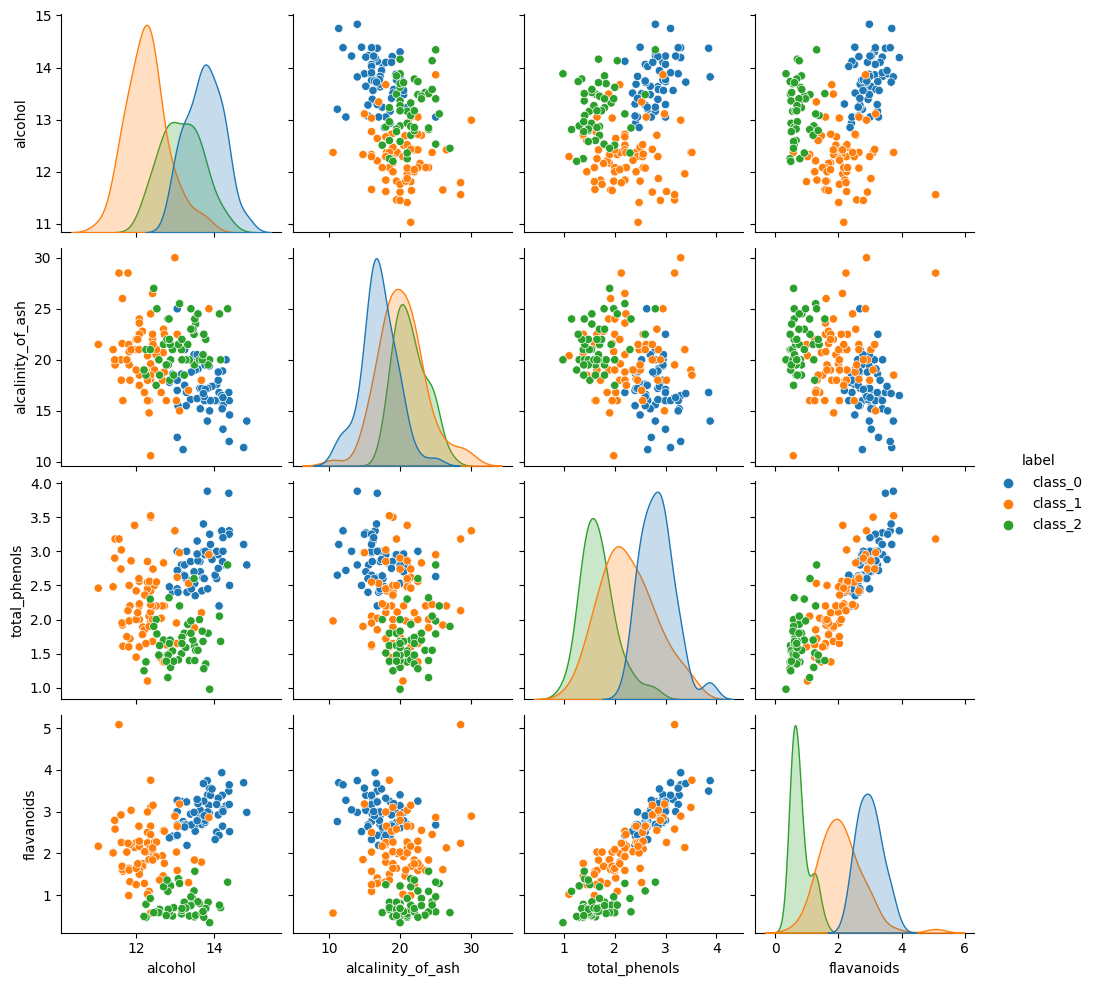

In [ ]:
#특성 간 상관관계와 레이블 분포를 시각화

import seaborn as sns

df_analysis = pd.DataFrame(wine.data, columns = wine.feature_names)
wine_class = pd.Series(wine.target, dtype = 'category')
wine_class = wine_class.cat.rename_categories(wine.target_names)

df_analysis['label'] = wine_class
sns.pairplot(vars = ['alcohol', 'alcalinity_of_ash', 'total_phenols', 'flavanoids'],\
             hue = 'label', data = df_analysis) #특성 간 상관관계와 특성별 레이블 분포 확인, hue 인자 : 색상으로 구분

In [ ]:
#랜덤 포레스트 분류

from sklearn.ensemble import RandomForestClassifier

df_wine_proc = df_wine.drop(labels = ['alcalinity_of_ash', 'total_phenols', 'proanthocyanins'], axis = 1) # 중요도가 낮은 속성 제거
df_wine_proc = df_wine_proc.astype({'label' : 'int'})

train, test = train_test_split(df_wine_proc, test_size = 0.3, random_state = 0,\
                               stratify = df_wine_proc['label'])

train_X = train[train.columns[:10]]
train_Y = train[train.columns[10:]]
test_X = test[test.columns[:10]]
test_Y = test[test.columns[10:]]

model = RandomForestClassifier(n_estimators = 3)
model.fit(train_X, train_Y)
pred_RF = model.predict(test_X)
print('랜덤 포레스트 알고리즘 분류 정확도: ', metrics.accuracy_score(pred_RF, test_Y))


랜덤 포레스트 알고리즘 분류 정확도:  0.9629629629629629


<ipython-input-9-a4e923434b74>:5: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df_wine_proc = df_wine.drop(labels = ['alcalinity_of_ash', 'total_phenols', 'proanthocyanins'], axis = 1)
<ipython-input-9-a4e923434b74>:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(train_X, train_Y)


In [2]:
#화이트와인과 레드와인 분류

#데이터프레임 생성

import numpy as np
import pandas as pd

df_white = pd.read_csv('/content/wine+quality/winequality-white.csv' ,sep = ';')
df_red = pd.read_csv('/content/wine+quality/winequality-red.csv' , sep = ';')

df_white

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [3]:
#레이블 열 추가

df_white['class'] = 1
df_red['class'] = 0

df_white

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,1
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,1
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,1
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,1


In [4]:
#데이터셋 병합

df_wine_category = pd.concat([df_white, df_red])

In [5]:
#학습 데이터 분할

from sklearn.model_selection import train_test_split

df_wine_category = df_wine_category.astype({'class' : int})
train, test = train_test_split(df_wine_category, test_size = 0.3, random_state = 0,\
                               stratify = df_wine_category['class'])

train_X = train[train.columns[:12]]
train_Y = train[train.columns[12:]]
test_X = test[test.columns[:12]]
test_Y = test[test.columns[12:]]

train_X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
2126,6.5,0.43,0.28,12.0,0.056,23.0,174.0,0.99860,3.31,0.55,9.3,5
871,7.7,0.34,0.58,11.1,0.039,41.0,151.0,0.99780,3.06,0.49,8.6,5
3213,7.5,0.18,0.45,4.6,0.041,67.0,158.0,0.99270,3.01,0.38,10.6,6
725,6.4,0.39,0.21,1.2,0.041,35.0,136.0,0.99225,3.15,0.46,10.2,5
4557,6.1,0.37,0.46,12.0,0.042,61.0,210.0,0.99700,3.17,0.59,9.7,6
...,...,...,...,...,...,...,...,...,...,...,...,...
3754,5.4,0.46,0.15,2.1,0.026,29.0,130.0,0.98953,3.39,0.77,13.4,8
2032,6.5,0.25,0.20,1.4,0.024,29.0,101.0,0.99160,3.24,0.54,10.8,6
3239,6.6,0.34,0.24,3.3,0.034,29.0,99.0,0.99031,3.10,0.40,12.3,7
1411,6.4,0.47,0.40,2.4,0.071,8.0,19.0,0.99630,3.56,0.73,10.6,6


In [6]:
#SVM 이진분류

from sklearn import svm
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

model = svm.SVC(kernel = 'linear', C=0.1, gamma = 0.1)
model.fit(train_X, train_Y)
pred_SVM = model.predict(test_X)

print('SVM 알고리즘 분류 정확도: ', metrics.accuracy_score(pred_SVM, test_Y))
print(classification_report(pred_SVM, test_Y)) #classification_report : 다각도로 모형을 평가함

#정밀도(Precision) : 모형의 분류 결과 맞은 것의 비율, 모형이 레드와인으로 분류한 모든 데이터 중 실제로 레드와인인 것의 비율
#재현율(Recall) : 실제로 레드와인인 데이터 중 모형이 레드와인으로 분류한 것의 비율
#F1-score : 정밀도와 재현율의 조화평균

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVM 알고리즘 분류 정확도:  0.9846153846153847
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       466
           1       0.99      0.99      0.99      1484

    accuracy                           0.98      1950
   macro avg       0.97      0.98      0.98      1950
weighted avg       0.98      0.98      0.98      1950



In [29]:
#랜덤 포레스트 이진분류
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators = 10)
model.fit(train_X, train_Y)
pred_RF = model.predict(test_X)

print('Random Forest 알고리즘 분류 정확도: ', metrics.accuracy_score(pred_RF, test_Y))
print(classification_report(pred_RF, test_Y))

Random Forest 알고리즘 분류 정확도:  0.5111111111111111


<ipython-input-29-dcbe53524d4d>:6: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



NameError: ignored

In [8]:
!pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
heart_disease = fetch_ucirepo(id=45)
heart_disease

In [20]:
print(heart_disease.data.features)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   1       145   233    1        2      150      0      2.3   
1     67    1   4       160   286    0        2      108      1      1.5   
2     67    1   4       120   229    0        2      129      1      2.6   
3     37    1   3       130   250    0        0      187      0      3.5   
4     41    0   2       130   204    0        2      172      0      1.4   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   45    1   1       110   264    0        0      132      0      1.2   
299   68    1   4       144   193    1        0      141      0      3.4   
300   57    1   4       130   131    0        0      115      1      1.2   
301   57    0   2       130   236    0        2      174      0      0.0   
302   38    1   3       138   175    0        0      173      0      0.0   

     slope   ca  thal  
0        3  0.0   6.0  
1        2  3.0   3.0  
2        2  2.0

In [20]:
import pandas as pd

df = pd.DataFrame(heart_disease.data.features)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0


In [23]:
print(heart_disease.data.targets)

     num
0      0
1      2
2      1
3      0
4      0
..   ...
298    1
299    2
300    3
301    1
302    0

[303 rows x 1 columns]


In [21]:
df['label'] = heart_disease.data.targets #레이블 열 추가
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,2
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1


In [22]:
df_heart = df.copy() #사본 데이터셋 생성

In [23]:
import numpy as np

df_heart.isna().sum() #결측치 개수 확인

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
label       0
dtype: int64

In [27]:
df_heart.replace('?',  np.nan, inplace = True)
df_heart = df_heart.dropna()
df_heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57,0,4,140,241,0,0,123,1,0.2,2,0.0,7.0,1
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,2
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3


In [30]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

#랜덤포레스트 분류

train, test = train_test_split(df_heart, test_size = 0.3, random_state=0, stratify = df_heart['label'])

train_X = train[train.columns[:13]]
train_Y = train[train.columns[13:]]
test_X = test[test.columns[:13]]
test_Y = test[test.columns[13:]]

model = RandomForestClassifier(n_estimators = 4)
model.fit(train_X, train_Y)
pred_RF = model.predict(test_X)

print('Random Forest 알고리즘 분류 정확도: ', metrics.accuracy_score(pred_RF, test_Y))
print(classification_report(pred_RF, test_Y))

Random Forest 알고리즘 분류 정확도:  0.5555555555555556
              precision    recall  f1-score   support

           0       0.90      0.72      0.80        60
           1       0.12      0.11      0.11        19
           2       0.36      0.50      0.42         8
           3       0.09      0.33      0.14         3
           4       0.00      0.00      0.00         0

    accuracy                           0.56        90
   macro avg       0.30      0.33      0.29        90
weighted avg       0.66      0.56      0.60        90



<ipython-input-30-afb81775d4e1>:15: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.



In [31]:
#SVM 분류

from sklearn import svm
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

model = svm.SVC(kernel = 'linear', C=0.1, gamma = 0.1)
model.fit(train_X, train_Y)
pred_SVM = model.predict(test_X)

print('SVM 알고리즘 분류 정확도: ', metrics.accuracy_score(pred_SVM, test_Y))
print(classification_report(pred_SVM, test_Y))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.



SVM 알고리즘 분류 정확도:  0.5555555555555556
              precision    recall  f1-score   support

           0       0.94      0.73      0.82        62
           1       0.12      0.15      0.14        13
           2       0.27      0.27      0.27        11
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         0

    accuracy                           0.56        90
   macro avg       0.27      0.23      0.25        90
weighted avg       0.70      0.56      0.62        90



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.



In [48]:
#와인 등급 예측

#레이블 분포 확인 - 와인 등급 분포 확인

import numpy as np
import pandas as pd
import plotly.express as px

df_white = pd.read_csv('/content/wine+quality/winequality-white.csv', sep=';')
df_red = pd.read_csv('/content/wine+quality/winequality-red.csv', sep=';')
df_wine_predic = pd.concat([df_white, df_red])

px.histogram(df_wine_predic.quality)

#와인 등급 : 매우 낮음(0) 부터 매우 높음(10)까지 부여

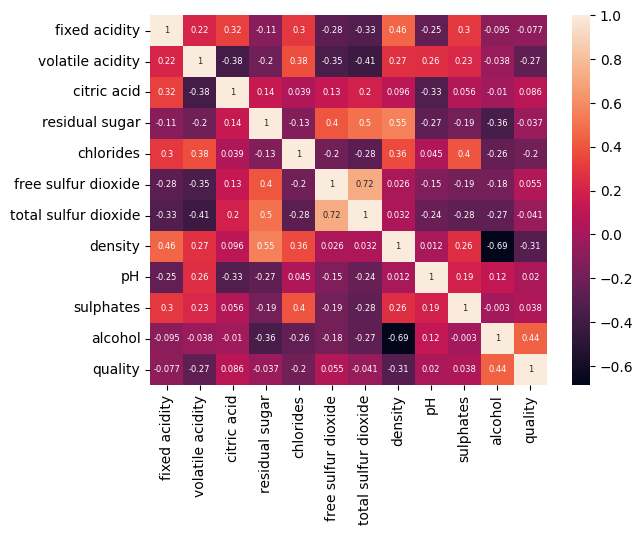

In [49]:
# 특성들의 상관관계 및 특성과 레이블의 상관관계 파악
# 데이터 특성 히트맵

import matplotlib.pyplot as plt
import seaborn as sns

ax = sns.heatmap(df_wine_predic.corr(), annot = True, annot_kws={'size' : 6})
#corr() : 특성 간 상관관계를 계산, annot = True로 지정하면 히트맵의 각 칸에 상관계수를 표시
#annot_kws : 글꼴 크기와 색을 설정함

plt.show()

In [50]:
#테스트 데이터 분할

from sklearn.model_selection import train_test_split

df_wine_predic.columns = df_wine_predic.columns.str.replace(' ', '_') #열 이름에 포함된 공백을 언더바(_)로 교체
train, test = train_test_split(df_wine_predic, test_size = 0.3, random_state=0, stratify = df_wine_predic['quality'])
#레이블인 quality 열의 분포를 기준으로 학습 데이터와 테스트 데이터를 7:3으로 분리

train_X = train[train.columns[:11]]
train_Y = train[train.columns[11:]]
test_X = test[test.columns[:11]]
test_Y = test[test.columns[11:]]

In [44]:
#다중 선형 회귀모형 학습

from statsmodels.formula.api import ols, glm

reg_form = 'quality ~ fixed_acidity + volatile_acidity + citric_acid\
            + residual_sugar + chlorides + free_sulfur_dioxide\
            + total_sulfur_dioxide + density + pH + sulphates + alcohol'

reg_result = ols(reg_form, data=train).fit()

In [45]:
#다중 선형 회귀모형 예측

reg_predict = reg_result.predict(test)
print(reg_predict)
reg_predict = reg_predict.astype('int')

1209    6.209276
3193    5.647934
1192    6.724634
3852    6.538731
2022    5.294939
          ...   
305     5.485388
1963    5.194879
4305    6.015268
4798    5.933790
1384    4.731303
Length: 1950, dtype: float64


In [46]:
#예측 정확도

from sklearn import metrics
print('다중 선형회귀 알고리즘 예측 정확도: ', metrics.accuracy_score(reg_predict, test_Y))

#예측 정확도가 약 46% -> 분류 문제보다는 정확도가 낮게 나타남. 범주형과 연속형 값의 차이 때문

다중 선형회귀 알고리즘 예측 정확도:  0.4574358974358974


In [52]:
#랜덤 포레스트 예측

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators= 100) #n_estimators : 트리의 개수 설정
model.fit(train_X, train_Y)
pred_RF = model.predict(test_X)
print('랜덤 포레스트 알고리즘 예측 정확도: ', metrics.accuracy_score(pred_RF, test_Y))

#하이퍼파라미터 튜닝 방법 : 베이지안 최적화, 그리드 서치, 랜덤 서치

<ipython-input-52-47dc4068a272>:6: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



랜덤 포레스트 알고리즘 예측 정확도:  0.6625641025641026


In [54]:
#인공신경망을 활용한 와인 등급 예측

from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(64, input_dim = 11, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(7, activation = 'softmax')) #와인 등급이 3에서 9까지의 정수이므로 출력 수를 7개로 설정
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 64)                768       
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dense_7 (Dense)             (None, 16)                528       
                                                                 
 dense_8 (Dense)             (None, 8)                 136       
                                                                 
 dense_9 (Dense)             (None, 7)                 63        
                                                                 
Total params: 3575 (13.96 KB)
Trainable params: 3575 (13.96 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [56]:
#컴파일
#compile() : 실제로 모형을 사용할 수 있는 상태로 만듦

model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [63]:
#원핫 인코딩

from sklearn.preprocessing import LabelEncoder
from tensorflow.python.keras.utils import np_utils

#레이블을 학습 데이터 레이블 모형으로 변환하기
encoder = LabelEncoder()
encoder.fit(train_Y)

onehot_train_Y = encoder.transform(train_Y)
#원핫 인코딩(One-hot encoding)으로 1차원의 레이블 데이터를 클래스마다 1과 0으로 이루어진 7차원 데이터로 변환
train_f_Y = np_utils.to_categorical(onehot_train_Y)
onehot_test_Y = encoder.transform(test_Y)
test_f_Y = np_utils.to_categorical(onehot_test_Y)

print(test_f_Y)

[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]]


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [ ]:
#인공신경망 학습
model.fit(train_X, train_f_Y, epochs = 500, batch_size = 10)

In [65]:
#예측 성능 평가
model.evaluate(test_X, test_f_Y)

61/61 [==============================] - 1s 5ms/step - loss: 1.6923 - accuracy: 0.5318


[1.692277431488037, 0.5317948460578918]

In [ ]:
#심장질환 분류
#label열 : 0 : 질환없음, 1 : 경증 심장질환, 2 : 중등도심장 질환, 3 : 중증 심장질환

(array([160.,  54.,  35.,  48.]),
 array([0., 1., 2., 3., 4.]),
 <BarContainer object of 4 artists>)

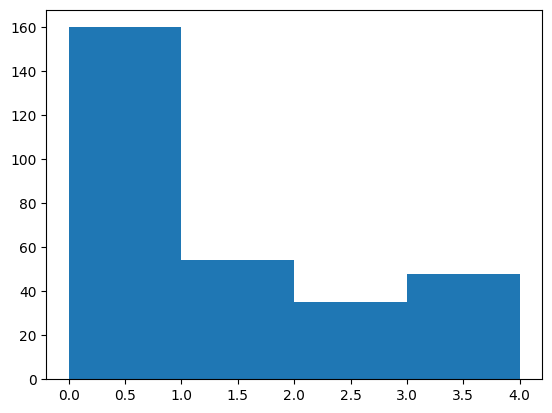

In [66]:
import matplotlib.pyplot as plt
plt.hist(df_heart.label, bins = 4)

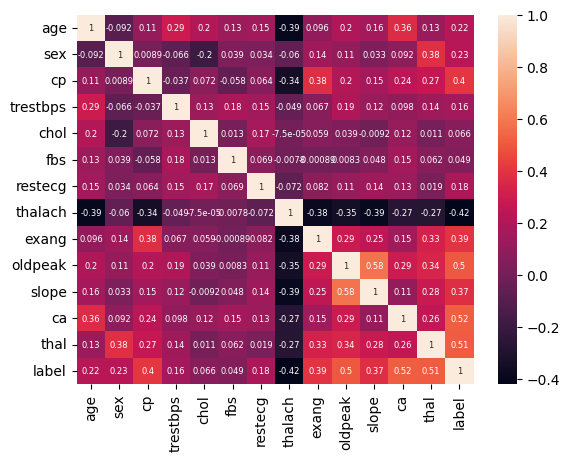

In [67]:
import seaborn as sns

ax = sns.heatmap(df_heart.corr(), annot=True, annot_kws={'size' : 6})
plt.show()

In [69]:
#랜덤 포레스트 알고리즘을 사용하여 학습과 테스트 수행

from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

model = RandomForestClassifier(n_estimators = 100)
model.fit(train_X, train_Y)
pred_RF = model.predict(test_X)

print('랜덤 포레스트 알고리즘 예측 정확도: ', metrics.accuracy_score(pred_RF, test_Y))

<ipython-input-69-b9a8de0df319>:7: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



랜덤 포레스트 알고리즘 예측 정확도:  0.6584615384615384
